# Cryptocurrency Market Analysis


In this project, we will analyze data from Yahoo Finance of three popular cryptocurrencies to date.

We will use Pandas to extract and analyze the information, visualize it, and analyze risks based on it's performance history.

#### Here are questions we will try to answer:

1. What was the change of price over time?
2. What was the daily return on average of a stock?
3. What was the moving average of various stock?
4. What is the correlation between daily returns of different stock?
5. How much value do we put at risk by investing in a stock?
6. How can we attempt to predict future stock behavior?

In [1]:
#python data analysis imports
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#grab data imports
import pandas_datareader.data as pdr
from datetime import datetime

In [2]:
#We are going to analyze the top cryptocurrencies.
cc_list = ['BTC-USD','ETH-USD','LTC-USD']

In [3]:
#Setting the end date to today
end = datetime.today()

#Start date set to one year back
start = datetime(end.year-1,end.month,end.day)

In [4]:
#using yahoo finance to grab cryptocurrency data
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)
ETH = pdr.DataReader('ETH-USD','yahoo',start,end)
LTC = pdr.DataReader('LTC-USD','yahoo',start,end)

In [5]:
#STATISTICS FOR BTC'S STOCK
BTC.describe()

,High,Low,Open,Close,Volume,Adj Close
count,366.000000,366.000000,366.000000,366.000000,3.660000e+02,366.000000
mean,9036.096669,8702.614051,8869.656581,8877.045522,2.850774e+10,8877.045522
std,1484.870362,1497.216945,1491.223887,1495.633102,1.128577e+10,1495.633102
min,5331.833984,4106.980957,5002.578125,4970.788086,1.220050e+10,4970.788086
25%,7800.332642,7517.305298,7652.531738,7652.029297,1.943980e+10,7652.029297
50%,9190.421387,8829.151855,9027.951172,9050.458496,2.592223e+10,9050.458496
75%,9832.192383,9528.970703,9672.997559,9675.519775,3.580401e+10,9675.519775
max,12359.056641,11954.525391,12251.895508,12254.402344,7.415677e+10,12254.402344


In [6]:
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-27,8285.617188,8125.431641,8251.273438,8245.915039,1.414115e+10,8245.915039
2019-09-28,8261.707031,7990.497070,8246.037109,8104.185547,1.303463e+10,8104.185547
2019-09-29,8314.231445,7830.758789,8104.226562,8293.868164,1.711547e+10,8293.868164
2019-09-30,8497.692383,8232.679688,8299.720703,8343.276367,1.530534e+10,8343.276367
2019-10-01,8393.041992,8227.695312,8344.212891,8393.041992,1.312571e+10,8393.041992


In [7]:
#INFORMATION ABOUT BTC DATAFRAME
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2019-09-27 to 2020-09-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       366 non-null    float64
 1   Low        366 non-null    float64
 2   Open       366 non-null    float64
 3   Close      366 non-null    float64
 4   Volume     366 non-null    float64
 5   Adj Close  366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


## What is the change in stock's price over time?

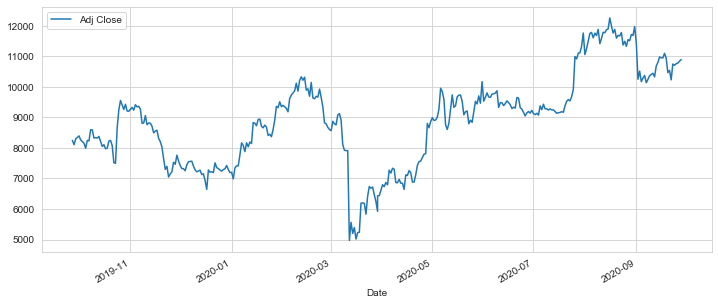

In [8]:
#Using pandas we canplot the stocks adjusted closing price
BTC['Adj Close'].plot(legend = True, figsize=(12,5))

Within the year, we can see the value of BTC almost reach up to 20K.

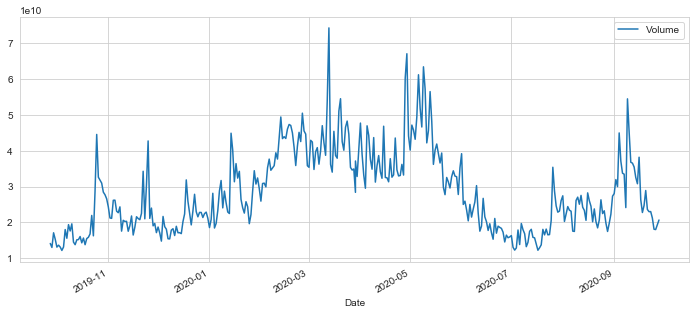

In [9]:
#Using pandas once more to plot the total volume being traded over time
BTC['Volume'].plot(legend=True,figsize=(12,5))

## What was the moving average of the stocks?

In [10]:
#using pandas we will create moving averages for 10, 20 and 50 day periods of time

ma_days = [10,20,50]

for ma in ma_days:
    column_name = "MA %s days" %(str(ma))
    BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()

In [11]:
BTC.tail()


,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days
Date,,,,,,,,,
2020-09-23,10765.794922,10215.205078,10227.479492,10745.548828,2.301754e+10,10745.548828,10767.018359,10553.717432,11188.554414
2020-09-24,10757.548828,10594.047852,10747.472656,10702.290039,2.123255e+10,10702.290039,10757.552246,10580.353564,11167.004746
2020-09-25,10778.500000,10682.082031,10702.237305,10754.437500,1.810501e+10,10754.437500,10735.505469,10604.057861,11150.064043
2020-09-26,10804.732422,10643.458008,10752.939453,10774.426758,1.801688e+10,10774.426758,10718.049121,10624.301025,11130.471660
2020-09-28,10941.750977,10778.808594,10778.808594,10892.298828,2.067390e+10,10892.298828,10712.820410,10662.340137,11114.802852


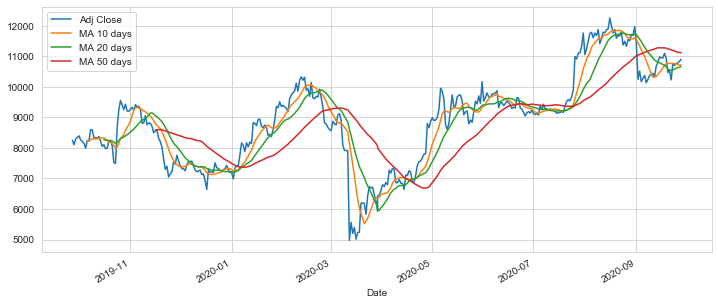

In [12]:
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True,figsize=(12,5))

Genereally some casual dips in the past month but overall an upward trend.

## What was the daily return average of a stock?

In [13]:
#In order calculate daily return we can use the percentage change of the adjusted closing price

BTC['Daily Return'] = BTC['Adj Close'].pct_change()

BTC['Daily Return'].tail()

Date
2020-09-23    0.050821
2020-09-24   -0.004026
2020-09-25    0.004873
2020-09-26    0.001859
2020-09-28    0.010940
Name: Daily Return, dtype: float64

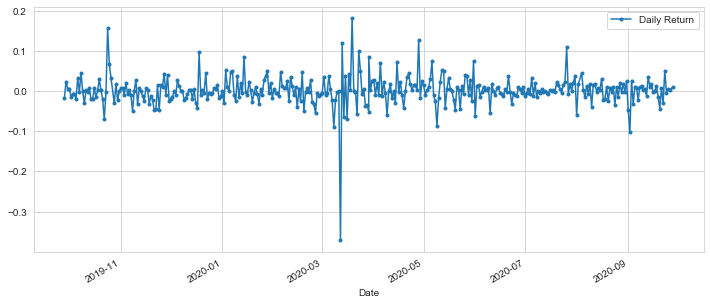

In [14]:
#Let us now plot the daily return
BTC['Daily Return'].plot(marker='.',legend=True,figsize=(12,5))

Positive daily returns seem to be more frequent than negative returns.

## What was the correlation between daily returns of different stocks?

In [15]:
#Let's read the 'Adj Close' column from all the cryptocurrencies giants

close_df = pdr.DataReader(cc_list,'yahoo',start,end)['Adj Close']

In [16]:
close_df.tail()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2020-09-23,10745.548828,349.356659,44.961006
2020-09-24,10702.290039,352.161865,46.008736
2020-09-25,10754.437500,354.965271,46.131226
2020-09-26,10774.426758,357.321686,46.010441
2020-09-28,10891.488281,360.171173,46.407578


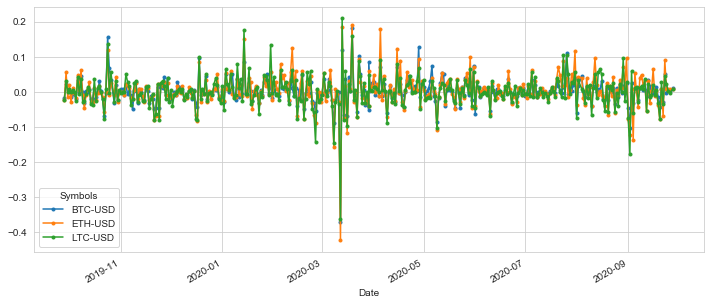

In [17]:
#Let's explore the returns again using the percentage change from the adj close.
returns_df = close_df.pct_change()
returns_df.plot(marker='.',legend=True,figsize=(12,5))

This plot is difficult to understand, let's use a jointplot instead.

In [18]:
returns_df.tail()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2020-09-23,0.050821,0.089746,0.044583
2020-09-24,-0.004026,0.008030,0.023303
2020-09-25,0.004873,0.007961,0.002662
2020-09-26,0.001859,0.006638,-0.002618
2020-09-28,0.010865,0.007975,0.008631


C:\Users\wikie\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


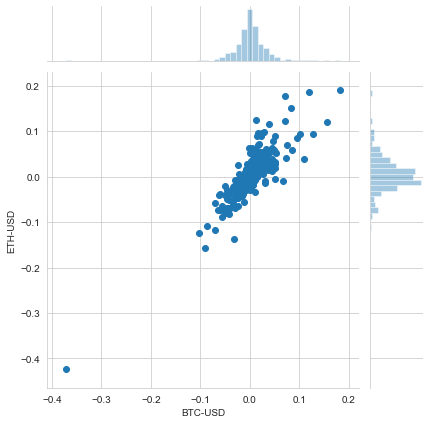

In [19]:
#We can now try to find the correlation between Bitcoin and Ethreum
sns.jointplot('BTC-USD','ETH-USD',returns_df,kind='scatter')

There seems to be a minor positive correlation between the two, the pearsonr correlation coefficient value of 0.4 agrees with that statement.

Let's use a pairplot to visualize all the tech giants in one view.

C:\Users\wikie\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\wikie\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


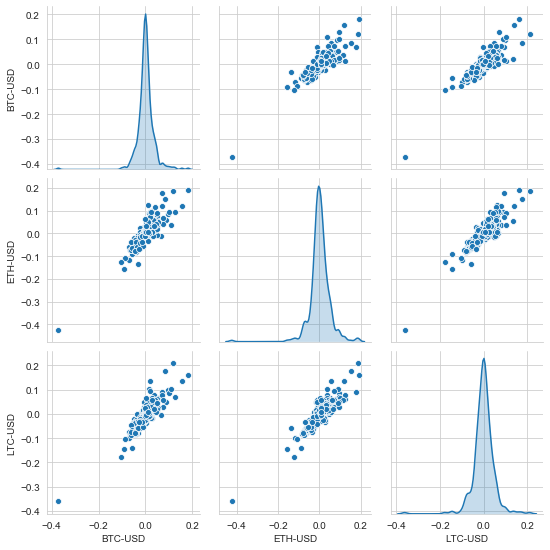

In [20]:
sns.pairplot(returns_df.dropna(),diag_kind='kde')

Quick and easy way to view correlations but let's use a correlation plot to see the actual numbers.

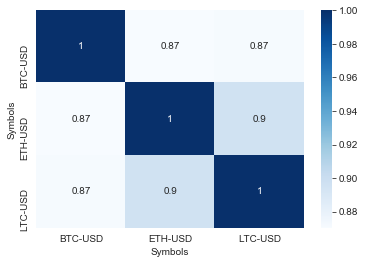

In [21]:
corr = returns_df.dropna().corr()

sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns, 
            annot=True,
            cmap='Blues')

#the darker the shade the higher the correlation

In [22]:
rets = returns_df.dropna()

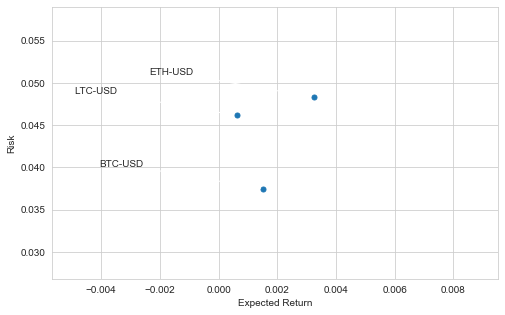

In [23]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(-120,20),
        textcoords = 'offset points', 
        ha = 'right', 
        va = 'bottom',
        arrowprops = dict(arrowstyle='->'))

As of January 12, the current trend for cryptocurrencies seem to output a negative return. We want a crypto with high return and low risk.

In [24]:
rets.head()

Symbols,BTC-USD,ETH-USD,LTC-USD
Date,,,
2019-09-28,-0.017188,-0.023311,-0.024473
2019-09-29,0.023406,0.054947,0.031984
2019-09-30,0.005957,-0.014075,0.000021
2019-10-01,0.005965,0.019003,0.008043
2019-10-02,-0.015852,-0.030497,0.000670


In [25]:
qt = rets['BTC-USD'].quantile(0.05)

In [26]:
qt_pct = abs(rets['BTC-USD'].quantile(0.05))*100
print(qt_pct)

4.645419554724208


In [27]:
print("The 0.05 empirical quantile of daily returns is at {0:.2f}. This means that with 95% confidence, the worst daily loss will not exceed {0:.2f}% (of the investment).".format(qt,qt_pct))

The 0.05 empirical quantile of daily returns is at -0.05. This means that with 95% confidence, the worst daily loss will not exceed -0.05% (of the investment).


## How can we predict future behavior?

In [28]:
days = 365
dt = 1/365
mu = rets.mean()['BTC-USD']
sigma = rets.std()['BTC-USD']

In [29]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [30]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close,MA 10 days,MA 20 days,MA 50 days,Daily Return
Date,,,,,,,,,,
2020-09-23,10765.794922,10215.205078,10227.479492,10745.548828,2.301754e+10,10745.548828,10767.018359,10553.717432,11188.554414,0.050821
2020-09-24,10757.548828,10594.047852,10747.472656,10702.290039,2.123255e+10,10702.290039,10757.552246,10580.353564,11167.004746,-0.004026
2020-09-25,10778.500000,10682.082031,10702.237305,10754.437500,1.810501e+10,10754.437500,10735.505469,10604.057861,11150.064043,0.004873
2020-09-26,10804.732422,10643.458008,10752.939453,10774.426758,1.801688e+10,10774.426758,10718.049121,10624.301025,11130.471660,0.001859
2020-09-28,10941.750977,10778.808594,10778.808594,10892.298828,2.067390e+10,10892.298828,10712.820410,10662.340137,11114.802852,0.010940


Text(0.5, 1.0, 'Monte Carlo Analysis for BTC')

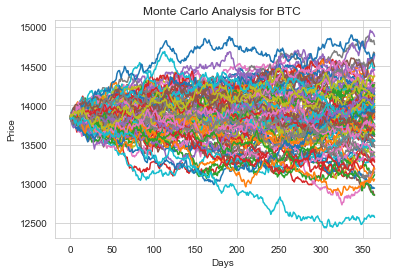

In [31]:
start_price = 13841.190 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for BTC')

In [32]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


Text(0.5, 1.0, 'Final price distribution for BTC after 365 days')

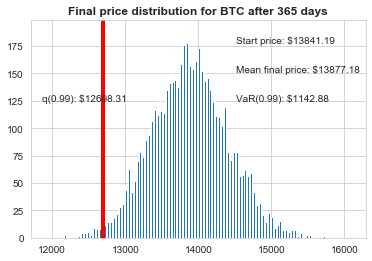

In [33]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for BTC after %s days" %days, weight='bold')